# Lab One : Visualization and Data Preprocessing

Members:

Apurv Mittal
Seemant Srivastava
Ravi Sivaraman
Tai Chowdhury


## 1. Business Understanding

We have acquired the Australian Weather dataset from Kaggle portal. It contains 10 years of weather data collected from many locations across Australia. These are daily weather observations. There are 145,459 observations with 23 attributes. These attributes describes temperatures, wind, cloud, pressure, and humidity conditions both. There numeric data are broken down into morning (am) and afternoon (pm). 

This dataset can be useful for scientific weather reporting and analysis projects for the respective country's regions. These projects can provide solutions to weather prediction problems. For our project, we have chosen RainTomorrow (categorical) and Rainfall (continuous) as predictor variables. `RainTomorrow` is a categorical attribute which indicates whether it is going to rain tomorrow - yes or no. `Rainfall` is a continuous attribute that measures amount of rainfall each of the particular locations have received (in mm). Using our models, we will be able to design an algorithm where the beureu can help to predict rainfall for different regions in Australia.

Source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## 2. Data Meaning Type

Bellow are the descriptions for all 23 attributes for our dataset:

Name 	              Type 	                            Description
Date	           Date (Object) 	   The date of observation
Location	       Nominal (Object)	   The name of the location of the weather station
MinTemp	           float64	           Minimum temperature in the 24 hours to 9am (in celsius).
MaxTemp	           float64	           Maximum temperature in the 24 hours to 9am (in celsius).
Rainfall	       float64	           Precipitation (rainfall) in the 24 hours to 9am (in mm).
Evaporation	       float64	           "Class A" pan evaporation in the 24 hours to 9am (in mm)
Sunshine	       float64	           Bright sunshine in the 24 hours to midnight (in hours).
WindGustDir	       Nominal (Object)	   Direction of strongest gust in the 24 hours to midnight (16 compass points).
WindGustSpeed	   float64	           Speed of strongest wind gust in the 24 hours to midnight (km per hour).
WindDir9am	       Nominal (Object)	   Wind direction averaged over 10 minutes prior to 9 am (compass points).
WindDir3pm	       Nominal (Object)	   Wind direction averaged over 10 minutes prior to 3 pm (compass points).
WindSpeed9am	   float64	           Wind speed averaged over 10 minutes prior to 9 am (km per hour). 
WindSpeed3pm	   float64	           Wind speed averaged over 10 minutes prior to 3 pm (km per hour). 
Humidity9am	       float64	           Relative humidity at 9 am (in percent).
Humidity3pm	       float64	           Relative humidity at 3 pm (in percent). 
Pressure9am	       float64	           Atmospheric pressure reduced to mean sea level at 9 am (hectopascals).
Pressure3pm	       float64	           Atmospheric pressure reduced to mean sea level at 3 pm (hectopascals). 
Cloud9am	       float64	           Fraction of sky obscured by cloud at 9 am (eighths).
Cloud3pm	       float64	           Fraction of sky obscured by cloud at 3 pm (eighths). 
Temp9am	           float64	           Temperature at 9 am (in celsius).
Temp3pm	           float64	           Temperature at 3 pm (in celsius). 
RainToday	       Nominal (Object)	   Whether it is going to rain current day - Yes or No
RainTomorrow	   Nominal (Object)	   Whether there will be rainfall tomorrow - Yes or No 

Source: http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

## 3. Data Quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import math

In [55]:
df = pd.read_csv("weatherAUS2.csv")
df2 = pd.read_csv("WindDirGust.csv")

In [56]:
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,State
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,New South Wales
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,New South Wales
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,New South Wales
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,New South Wales
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,New South Wales


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [58]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [59]:
df.dtypes.value_counts()

float64    16
object      8
dtype: int64

In [60]:
# Check for duplicates
df.duplicated().sum()

0

In [61]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
State             3009
dtype: int64

In [62]:
len(df)

145460

In [63]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
Location          0.000000
MaxTemp           0.866905
MinTemp           1.020899
Temp9am           1.214767
WindSpeed9am      1.214767
Humidity9am       1.824557
State             2.068610
WindSpeed3pm      2.105046
RainToday         2.241853
Rainfall          2.241853
RainTomorrow      2.245978
Temp3pm           2.481094
WindDir3pm        2.906641
Humidity3pm       3.098446
WindGustSpeed     7.055548
WindGustDir       7.098859
WindDir9am        7.263853
Pressure3pm      10.331363
Pressure9am      10.356799
Cloud9am         38.421559
Cloud3pm         40.807095
Evaporation      43.166506
Sunshine         48.009762
dtype: float64

In [64]:
# Removing records which are blank for Rain today and Rain tomorrow

df.dropna(subset = ["RainToday"], inplace=True)
df.dropna(subset = ["RainTomorrow"], inplace=True)

# REFERENCE: https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

In [65]:
# Check the null values again
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
Location          0.000000
Rainfall          0.000000
RainToday         0.000000
RainTomorrow      0.000000
MaxTemp           0.218060
MinTemp           0.332417
Temp9am           0.465952
WindSpeed9am      0.749359
Humidity9am       1.077514
WindSpeed3pm      1.797751
Temp3pm           1.863808
State             2.043513
Humidity3pm       2.486735
WindDir3pm        2.606775
WindGustSpeed     6.467216
WindGustDir       6.508413
WindDir9am        6.861429
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Evaporation      42.400222
Sunshine         47.451114
dtype: float64

##### REFERENCE: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd

In [66]:
df_num = df.columns[df.dtypes == 'float64']
df_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)


Numeric Variables: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Variables: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow', 'State'],
      dtype='object')


In [67]:
df_grouped = df.groupby(by='RainToday')
df_grouped.Evaporation.describe()

,count,mean,std,min,25%,50%,75%,max
RainToday,,,,,,,,
No,63297.0,5.890049,4.238066,0.0,3.0,5.2,7.8,86.2
Yes,17796.0,3.987430,3.641055,0.0,1.8,3.2,5.4,145.0


In [68]:
df_grouped.Sunshine.describe()

,count,mean,std,min,25%,50%,75%,max
RainToday,,,,,,,,
No,57286.0,8.305562,3.578020,0.0,6.1,9.3,11.0,14.5
Yes,16696.0,5.314459,3.538162,0.0,2.3,5.4,8.1,14.2


##### REFERENCE: https://stackoverflow.com/questions/43321455/pandas-count-null-values-in-a-groupby-function/43322220

In [69]:
# Number of null for Evaporation by the RainToday And Rain Tomorrow
df_E = df.Evaporation.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_E_mean = df.Evaporation.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:\n',df_E)
print('\nMean of Evaporation grouped by Rain Today and Tomorrow:\n',df_E_mean)

print('\nOverall Mean of Evaporation:\n',df.Evaporation.mean())

Number of Nulls in Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38964
           Yes              7071
Yes        No               7250
           Yes              6409
Name: Evaporation, dtype: int64

Mean of Evaporation grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              6.032209
           Yes             5.088293
Yes        No              4.081266
           Yes             3.877320
Name: Evaporation, dtype: float64

Overall Mean of Evaporation:
 5.472515506887167


In [70]:
# Number of null for Sunshine by the RainToday And Rain Tomorrow
df_S = df.Sunshine.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_S_mean = df.Sunshine.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:\n',df_S, '\n')
print('\nMean of Sunshine grouped by Rain Today and Tomorrow:\n',df_S_mean)
print('\nOverall Mean of Sunshine:\n',df.Sunshine.mean())

Number of Nulls in Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              44198
           Yes              7848
Yes        No               7982
           Yes              6777
Name: Sunshine, dtype: int64 


Mean of Sunshine grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              8.890686
           Yes             5.062517
Yes        No              6.678808
           Yes             3.765870
Name: Sunshine, dtype: float64

Overall Mean of Sunshine:
 7.630539861047242


In [71]:
# Number of null for Cloud 3 PM by the RainToday And Rain Tomorrow
df_C3 = df.Cloud3pm.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C3_mean = df.Cloud3pm.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:\n',df_C3, '\n')
print('\nMean of Cloud at 3 PM grouped by Rain Today and Tomorrow:\n',df_C3_mean)
print('\nOverall Mean of Cloud at 3 PM:\n',df.Cloud3pm.mean())

Number of Nulls in Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              38705
           Yes              6012
Yes        No               6224
           Yes              5153
Name: Cloud3pm, dtype: int64 


Mean of Cloud at 3 PM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.684394
           Yes             6.138312
Yes        No              5.118582
           Yes             6.624841
Name: Cloud3pm, dtype: float64

Overall Mean of Cloud at 3 PM:
 4.499250233195188


In [72]:
# Number of null for Cloud 9 AM by the RainToday And Rain Tomorrow
df_C9 = df.Cloud9am.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C9_mean = df.Cloud9am.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:\n',df_C9, '\n')
print('\nMean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:\n',df_C9_mean)
print('\nOverall Mean of Cloud at 9 AM:\n',df.Cloud9am.mean())

Number of Nulls in Cloud at 9 AM grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              36046
           Yes              5964
Yes        No               5762
           Yes              4853
Name: Cloud9am, dtype: int64 


Mean of Cloud at 9 AM  grouped by Rain Today and Tomorrow:
 RainToday  RainTomorrow
No         No              3.635105
           Yes             5.562970
Yes        No              5.436373
           Yes             6.681342
Name: Cloud9am, dtype: float64

Overall Mean of Cloud at 9 AM:
 4.431160817585808


In [73]:
df_impute = df
mat_yesno = df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()
RAINTODAY=0
RAINTOMORROW=1
COUNTER = 0
NO_NO = 0
for i in range(2):
    for j in range(2):
        for indexattr in mat_yesno.iloc[NO_NO].index:
            df_impute.loc[(df_impute["RainToday"] == mat_yesno.iloc[COUNTER].name[RAINTODAY] ) & (df_impute["RainTomorrow"] == mat_yesno.iloc[COUNTER].name[RAINTOMORROW]) & (df_impute[indexattr].isnull()), indexattr] = mat_yesno.iloc[COUNTER][indexattr]
        COUNTER = COUNTER + 1

        
        
#Filling the missing values for categorical variables with mode
df_impute['WindDir9am'] = df_impute['WindDir9am'].fillna(df_impute['WindDir9am'].mode()[0])
df_impute['WindGustDir'] = df_impute['WindGustDir'].fillna(df_impute['WindGustDir'].mode()[0])
df_impute['WindDir3pm'] = df_impute['WindDir3pm'].fillna(df_impute['WindDir3pm'].mode()[0])

In [74]:
(df_impute.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date             0.000000
RainToday        0.000000
Temp3pm          0.000000
Temp9am          0.000000
Cloud3pm         0.000000
Cloud9am         0.000000
Pressure3pm      0.000000
Pressure9am      0.000000
Humidity3pm      0.000000
Humidity9am      0.000000
WindSpeed3pm     0.000000
WindSpeed9am     0.000000
WindDir3pm       0.000000
WindDir9am       0.000000
WindGustSpeed    0.000000
WindGustDir      0.000000
Sunshine         0.000000
Evaporation      0.000000
Rainfall         0.000000
MaxTemp          0.000000
MinTemp          0.000000
Location         0.000000
RainTomorrow     0.000000
State            2.043513
dtype: float64

## 4. Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Evaporation', ylabel='Sunshine'>

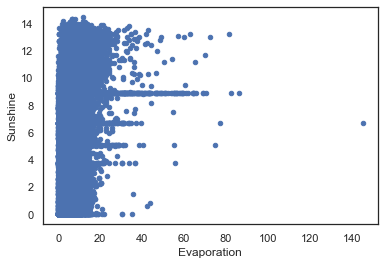

In [75]:
df_impute.plot.scatter("Evaporation", "Sunshine")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Evaporation', ylabel='MaxTemp'>

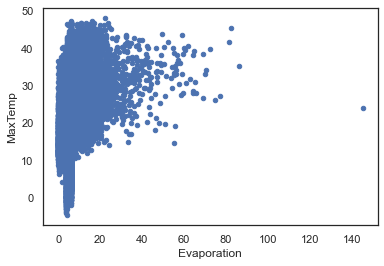

In [76]:
df_impute.plot.scatter("Evaporation", "MaxTemp")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Sunshine', ylabel='MaxTemp'>

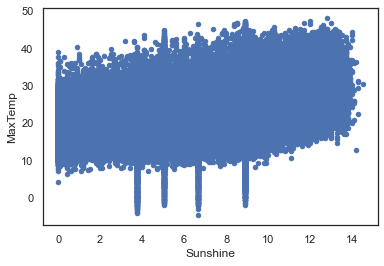

In [77]:
df_impute.plot.scatter("Sunshine", "MaxTemp")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Evaporation', ylabel='Cloud9am'>

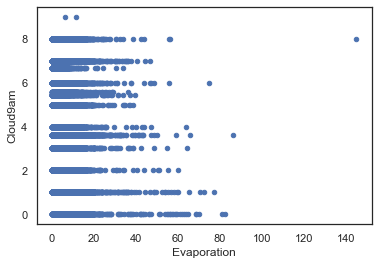

In [78]:
df_impute.plot.scatter("Evaporation", "Cloud9am")

(0.0, 38710.0)

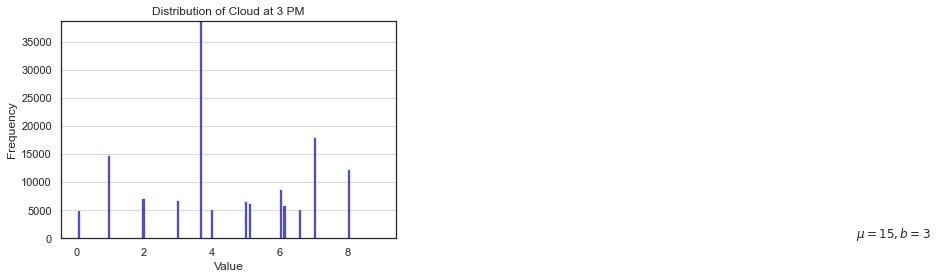

In [79]:

n, bins, patches = plt.hist(x=df_impute.Cloud3pm, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Cloud at 3 PM')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# Reference: https://realpython.com/python-histograms/

(0.0, 3240.0)

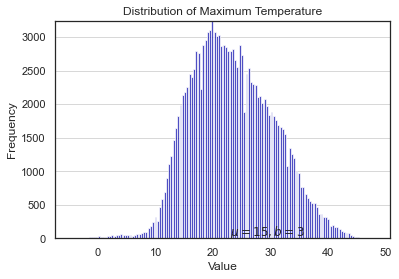

In [80]:

n, bins, patches = plt.hist(x=df_impute.MaxTemp, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Temperature')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

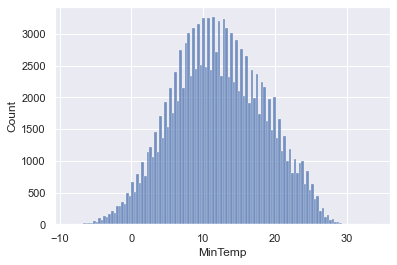

In [81]:
sns.set_style('darkgrid')
sns.histplot(df_impute.MinTemp)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

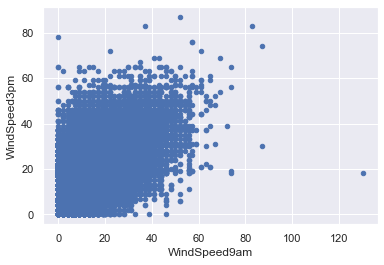

In [82]:
df_impute.plot.scatter("WindSpeed9am", "WindSpeed3pm")

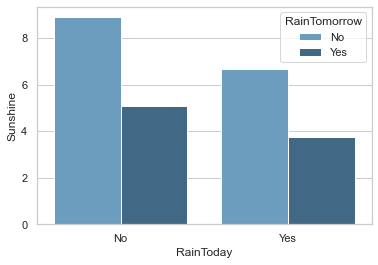

In [83]:
from numpy import median
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="RainToday", y="Sunshine", hue="RainTomorrow", data=df_impute, estimator=median,  palette="Blues_d")

# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

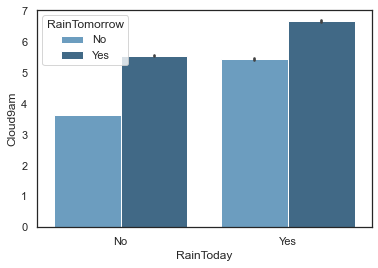

In [84]:
sns.set_theme(style="white")
ax = sns.barplot(x="RainToday", y="Cloud9am", hue="RainTomorrow", data=df_impute,  palette="Blues_d")

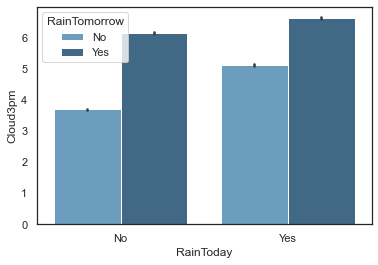

In [85]:
sns.set_theme(style="white")
ax = sns.barplot(x="RainToday", y="Cloud3pm", hue="RainTomorrow", data=df_impute,  palette="Blues_d")

## 5. Explore Joint Attributes

#### Correlation Matrix: 

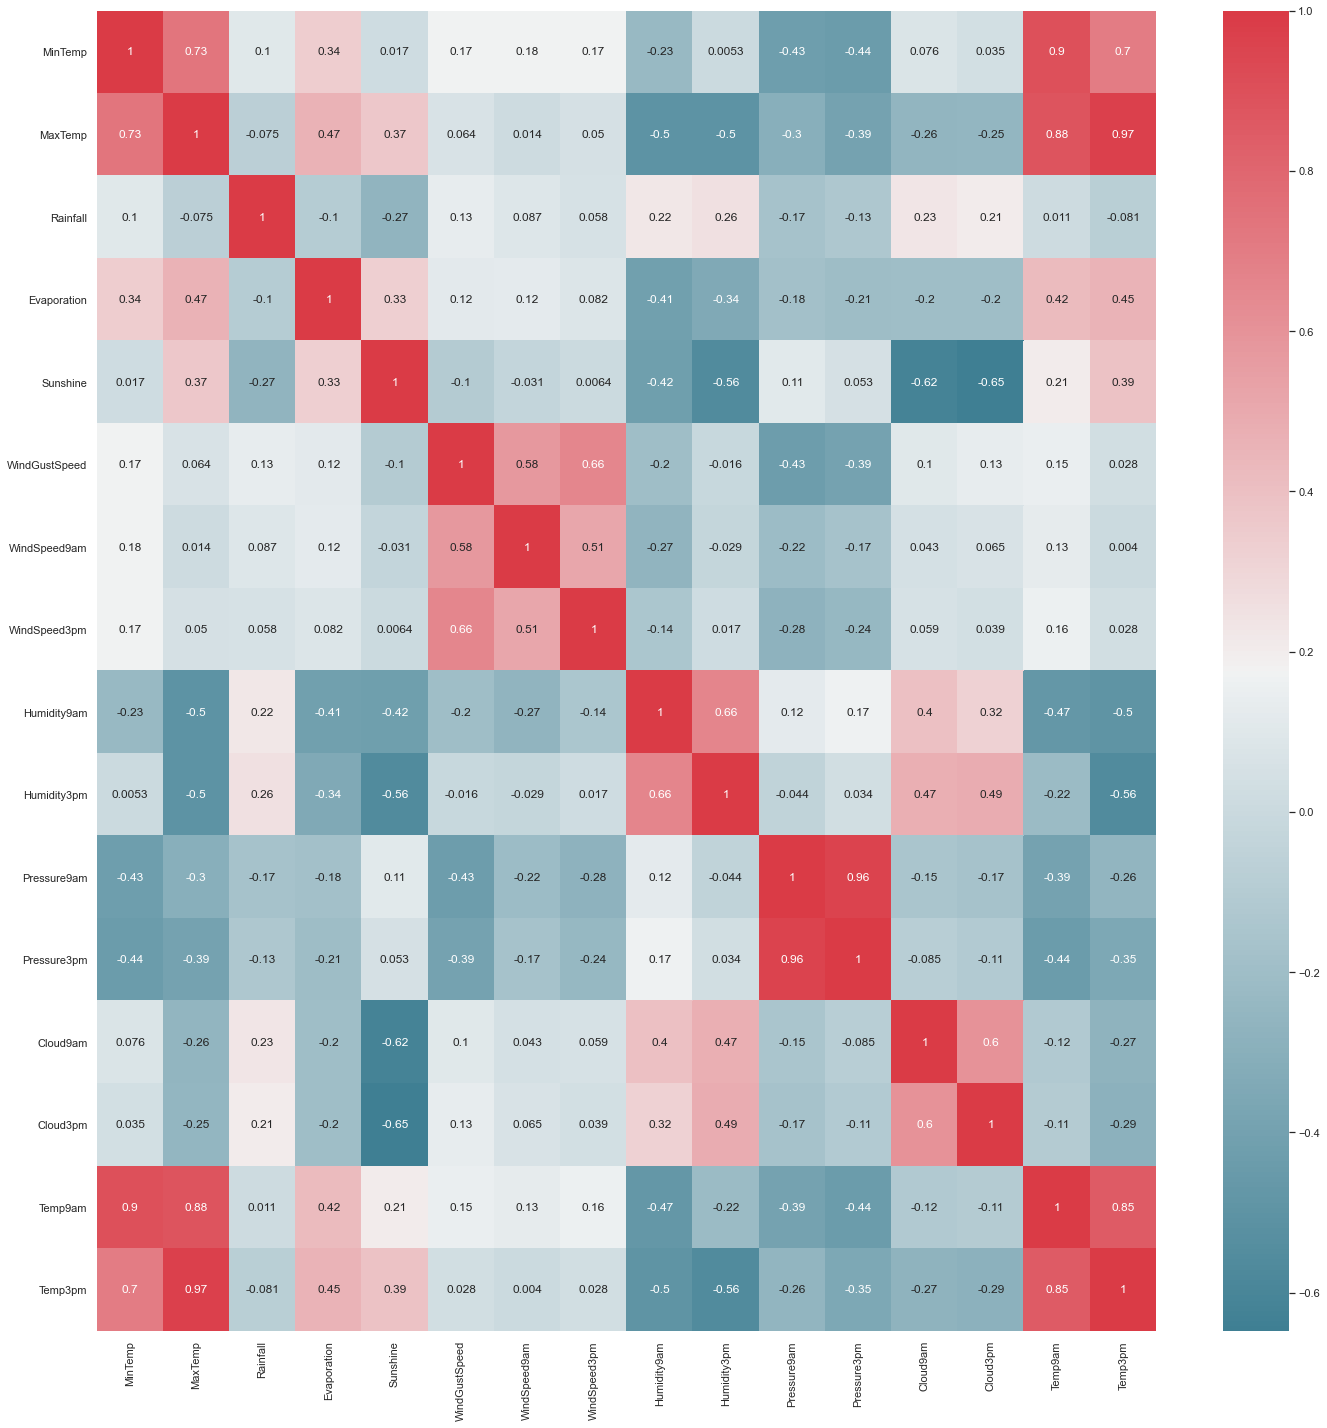

In [86]:
# plot the correlation matrix using seaborn

sns.set(style="darkgrid") # one of the many styles to plot using
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_impute.corr(), cmap=cmap, annot=True)

f.tight_layout()

In this correlation matrix, we notice some strong to mid positive correlations. There are some negative correlations but those are not significant (i.e. Cloud vs pressure). The strongest correlations we notice are in temperature attributes - min vs max temperature, am vs pm temperature, and am vs pm cloud attributes. Other than those attrubutes, here are some of the other pairs of positive correlations we notice between attributes:
evaporation and sunshine, Windspeed 9am vs Windspeed 3pm, and himidity vs cloud (am/pm).  

#### Cross-Tabulation:

<AxesSubplot:ylabel='State'>

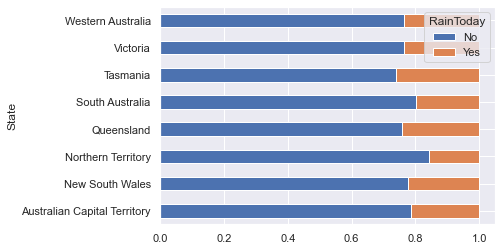

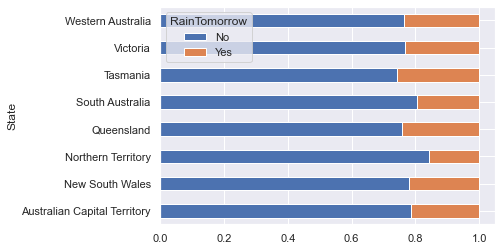

In [99]:
# RainToday By State (first one) and RainTomorrow by State (second one)
df3 = pd.merge(df_impute, df2, on = 'WindGustDir')
Location_Windir_RainToday = pd.crosstab(df3['State'], df3['RainToday'])
Location_Windir_RainToday.div(Location_Windir_RainToday.sum(1),axis=0).plot.barh(stacked = True)

Location_Windir_Raintomorrow = pd.crosstab(df3['State'], df3['RainTomorrow'])
Location_Windir_Raintomorrow.div(Location_Windir_Raintomorrow.sum(1),axis=0).plot.barh(stacked = True)

Explain

<AxesSubplot:ylabel='State'>

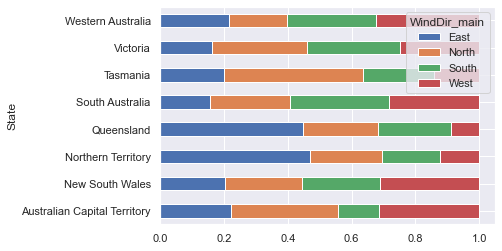

In [103]:
# WindDir By State
df3 = pd.merge(df_impute, df2, on = 'WindGustDir')
Location_Windir = pd.crosstab(df3['State'], df3['WindDir_main'])
Location_Windir.div(Location_Windir.sum(1),axis=0).plot.barh(stacked = True)


Explain

In [134]:
groupby_single = df_impute.groupby(['State']).agg({'Rainfall': ['mean', 'min', 'max']})
groupby_single

Rainfall            
                                  mean  min    max
State                                             
Australian Capital Territory  2.335164  0.0  107.6
New South Wales               2.739976  0.0  371.0
Northern Territory            2.676695  0.0  367.6
Queensland                    4.021798  0.0  278.4
South Australia               1.385510  0.0   84.6
Tasmania                      2.232459  0.0  156.8
Victoria                      1.682342  0.0  155.0
Western Australia             2.048591  0.0  114.4

In [ ]:
Explain

## 6.Explore Attributes and Class

In [118]:
df_impute2 = df_impute

df_impute2['AvgTemp'] = df_impute2[['MinTemp', 'MaxTemp']].mean(axis=1)

#Rainfall Vs Different Temperature Attributes

# Line plot for the effect of wind direction on rainfall 
WINdIR = ['E','ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_impute2.groupby('MinTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Minimum Temperature',
                         line_width=5.0,
                         )
             )
fig.add_trace(go.Scatter(y=df_impute2.groupby('MaxTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Maximum Temperature',
                         line_width=5.0,
                        )
             )
fig.add_trace(go.Scatter(y=df_impute2.groupby('AvgTemp')['Rainfall'].mean(),
                         x=WINdIR,
                         name = 'Average Temperature',
                         line_width=5.0,
                         )
             )

fig.update_layout(title='Rainfall vs Min/Max/Avg Temperature',
                  xaxis_title='Temperature [celsius]',
                  yaxis_title='Rainfall [mm]',
                  titlefont={'size': 28, 'family':'Serif'},
                  showlegend=True,
                  paper_bgcolor='lightgray',
                  plot_bgcolor='#999999',
                  width=750, height=500,
                 )
fig.show()

Explain

In [119]:
# Radar plot for differet temperature types on rainfall 
state = ['Australian Capital Territory','New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 
          'Tasmania', 'Victoria', 'Western Australia']

import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Barpolar(r=df_impute2.groupby('MinTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Minimum Temperature'
                          )
             )
fig.add_trace(go.Barpolar(r=df_impute2.groupby('MaxTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Maximum Temperature'
                          )
             )
fig.add_trace(go.Barpolar(r=df_impute2.groupby('AvgTemp')['Rainfall'].mean(),
                          theta=state,
                          name='Average Temperature'
                          )
             )

fig.update_layout(polar=dict(radialaxis=dict(visible=False,
                                             )
                             ),
                  showlegend=True,
                  title='Rainfall vs Temperature',
                  titlefont={'size': 28, 'family':'Serif'},
                  template='plotly_dark',
                  paper_bgcolor='gray',
                  width=600, height=500,
                 )
fig.show()

Explain

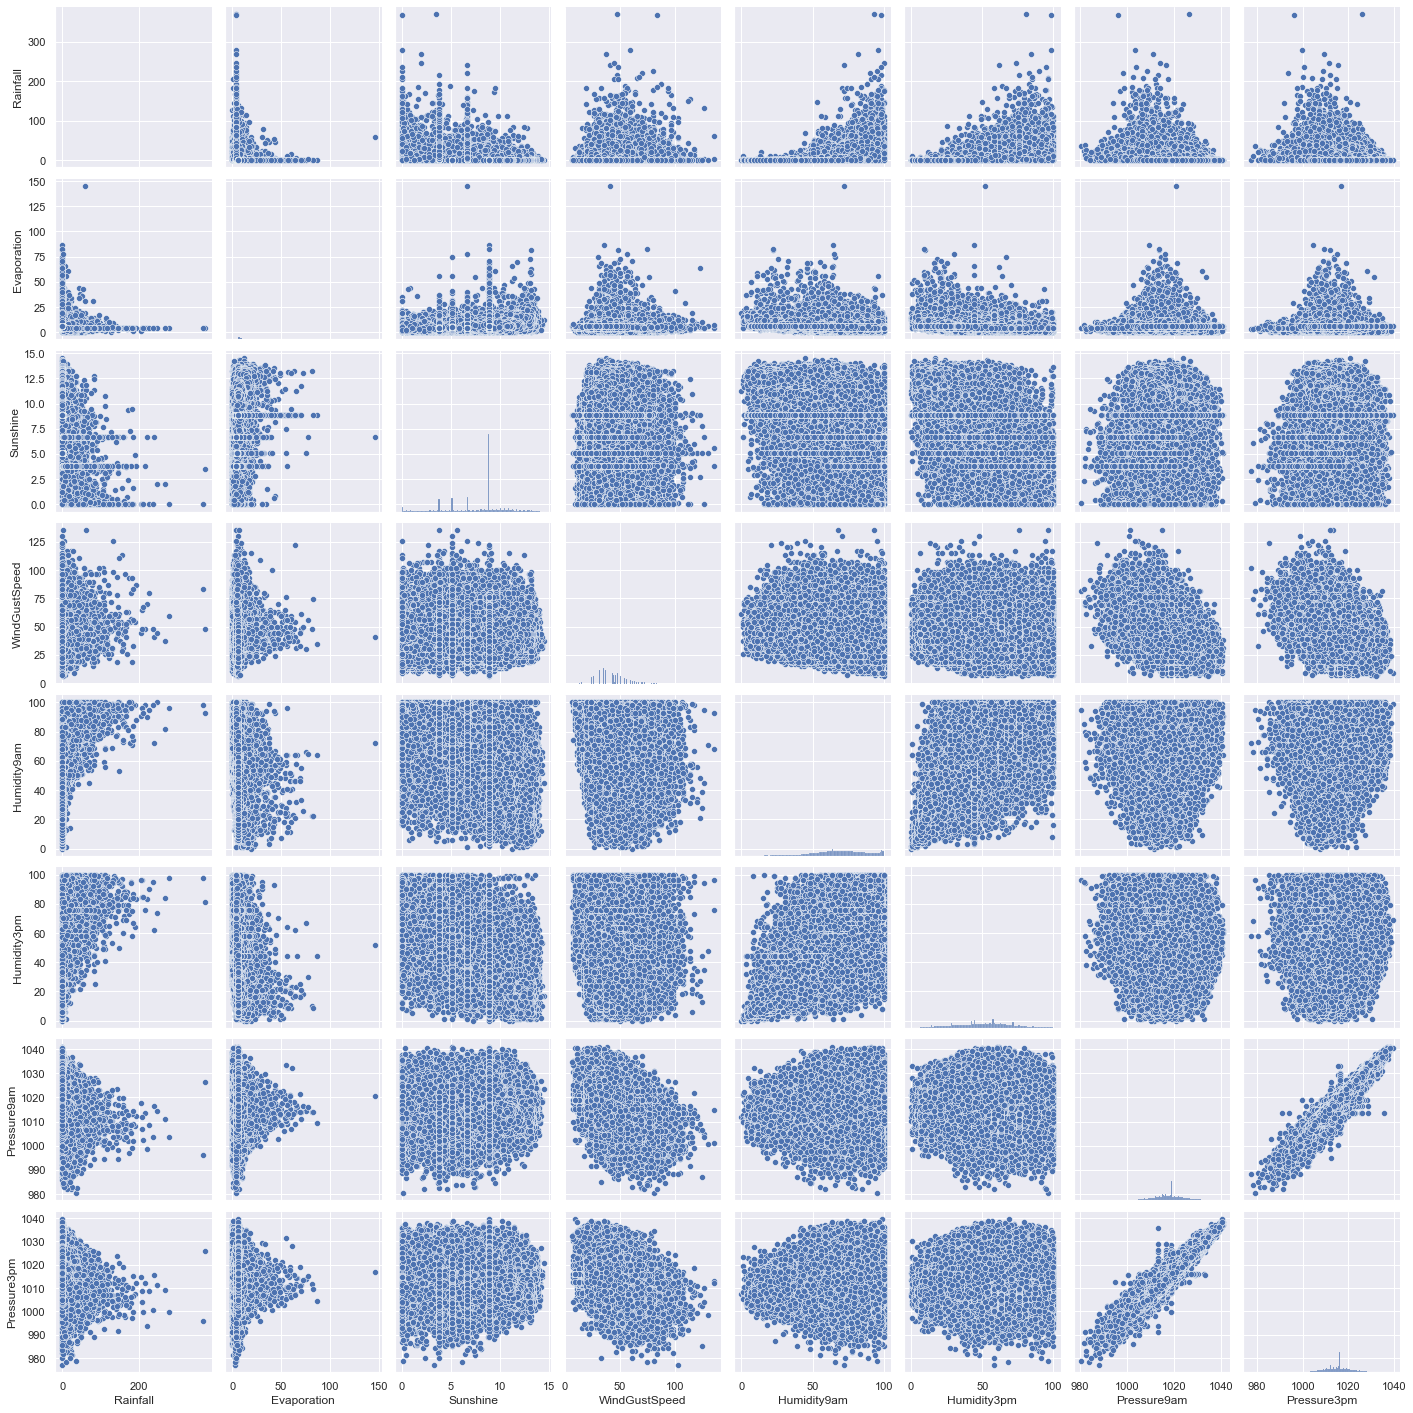

In [120]:
#Rainfall Vs Other Continuous Attributes 

sns.pairplot(df_impute[['Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
                       'Pressure9am', 'Pressure3pm']])

Explain

## 7.New Features

## 8. Exceptional Work